<a href="https://colab.research.google.com/github/Thomasjrd26/IA3/blob/main/TD/td2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TD2 IA - Classify hand-written digits using a Multi-Layer Perceptron

## Objectives :
 - Recognizing handwritten digits
 - Understanding the principle of a classifier Dense Neural Network (DNN)
 - Implementation using Keras/TensorFlow


The [MNIST dataset](https://www.kaggle.com/datasets/hojjatk/mnist-dataset) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists in __60,000 small images__ of handwritten digits for __learning__ and __10,000__ for __testing__.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result

## Step 1 - Import and Init

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

import sys,os

### Let's print the tools version

In [ ]:
print("Tensor Flow version : " + tf.__version__)
print("Keras version : " + keras.__version__)
print("Numpy version : " + np.__version__)

Tensor Flow version : 2.19.0
Keras version : 3.10.0
Numpy version : 2.0.2


## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
This dataset is available from [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [ ]:
# Load the MNIST dataset from Keras
from keras.datasets import mnist

# Get images and labels for train and test
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display the dimensions of the dataset
print("train_images : ",train_images.shape)
print("train_labels : ",train_labels.shape)
print("test_images  : ",test_images.shape)
print("test_labels  : ",test_labels.shape)

train_images :  (60000, 28, 28)
train_labels :  (60000,)
test_images  :  (10000, 28, 28)
test_labels  :  (10000,)


In [ ]:
# Affichage des valeurs des pixels pour une image pour les données d'entrainement
# Chaque pixel est codé par une valeur sur 8 bits non signée (uint8)
digit = train_images[2]
print(digit)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [ ]:
# Affichage du nombre de labels pour le training
len(train_labels)

60000

In [ ]:
# Affichage des labels pour les données d'entrainement
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# Affichage du nombre de labels pour le test
len(test_labels)

10000

In [ ]:
# Affichage des labels pour les données de test
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## <font color="red">**Exo1**</font> :
 - Quel est le type des données train_images, train_labels, test_images et test_labels?
 - Quelle est la dimension des images d'entrée ?
 - Quel est le label du troisème digit d'entrainement ?


Vos réponses :



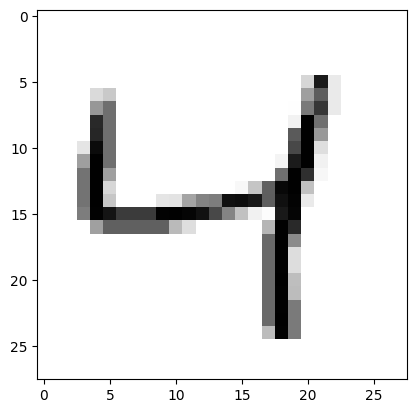

In [ ]:
# Let's visualize one sample from the training set (using Matplotlib)
plt.imshow(digit, cmap='Greys')
plt.show()

In [ ]:
# Let's check the corresponding label...
print(f"Label = {train_labels[2]}")

Label = 4


## Step 3 - Preparing the data

#### Before training the model, data need to be preprocessed to
 - Get the data in the form expected by the network (`reshape`)
 - Get all input values between [0, 1] (**normalization**)

#### Reshape and normalize the data
  - Multi-Layer Perceptrons do not understand '2D' inputs...
  - So, we need to reshape 28x28 pixels input images (a matrix) to a **784 features input vector**
  - To do so, we transform an array in the form (60000, 28, 28) with values of type uint8 between 0 and 255,
    to **an array in the form (60000, 28*28) of type float32** with values **between 0 and 1**.

In [ ]:
# Reshape
feature_vector_length = 28*28
num_classes = 10

# Comme les images sont les entrées, on les nomme x
print(f"train_images shape = {train_images.shape}")
x_train = train_images.reshape(len(train_images), feature_vector_length)
print(f"x_train shape = {x_train.shape}")
x_test = test_images.reshape(len(test_images), feature_vector_length)


# Normalize
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

train_images shape = (60000, 28, 28)
x_train shape = (60000, 784)
Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


#### Prepare the labels

Labels needs to be coded as categorical. As there will be 10 output classes, the label `3` for instance will be coded as `0001000000`

In [ ]:
# Convert target classes to categorical ones
print('Before categorical coding : {}'.format(train_labels[3]))
print('Before categorical coding : {}'.format(train_labels[4]))

# Comme les labels sont les sorties, on les nomme y
y_train = to_categorical(train_labels, num_classes)
y_test = to_categorical(test_labels, num_classes)

print('After categorical coding : {}'.format(y_train[3]))
print('After categorical coding : {}'.format(y_train[4]))

Before categorical coding : 1
Before categorical coding : 9
After categorical coding : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
After categorical coding : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Step 4 - Build a model with Keras

Let's build a first model of neural network

In [30]:
# Create the model
model = Sequential()
model.add(Dense(10, input_shape=(28*28,), activation='relu'))
model.add(Dense(10, activation='softmax'))
# Softmax, the activation function, is capable of generating a so-called multiclass probability distribution.
# That is, it computes the probability that a certain feature vector belongs to one class.

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

## <font color="red">**Exo2**</font> :
* Quel est le rôle de la fonction `softmax` utilisée pour la couche de sortie ? Que retourne cette fonction?<font color="red">get out</font>
* Combien de couches comportent le modèle? Combien y a-t-il de couche(s) cachée(s) ?
* Indiquer le nombre de neurones par couches
* Retrouver par le calcul le nombre de paramètres entrainables du modèle.

<u>Remarque</u> : plus le nombre de paramètres entrainables est grand, plus le modèle sera long à entrainer et plus il nécessitera de la mémoire pour stocker ces paramètres (empreinte mémoire)

<u>Vos réponses</u>:

## Step 5 - Train the model

#### Let's initialize hyper parameters before traingin the model

In [32]:
epochs = 32           # an epoch is one complete pass through the training data (all the training data are seen by the model)
                      # here, the model will see 20 times the complete training set
batch_size = 64       # the batch size is the number of training samples processed before the model is updated,
                      # in other words the number of training examples in one forward/backward pass.
                      # The higher the batch size, the more memory space you will need but the faster the training time.
# The number of iterations per epoch is defined as the ratio between the training set and the batch size.
# Here, it wiil be equal to (60000*0.8)/64 = 750
learning_rate = 0.01  # the learning rate controls how much to change the model in response to the estimated error
                      # each time the model weights are updated

#### Let's compile the model.
When compiling the model, we need to indicate :
 - an **optimizer** : the purpose of an optimizer is to adjust model parameters (weights and biaises) to minimize an error function (i.e. the loss)
 - a **loss function** : it is a function that compares the target and predicted output values; it measures how well the neural network models the training data. When training, we aim to minimize this loss between the predicted and target outputs.
 - some **metrics** : metrics are used to monitor and measure the performance of a model (during training and testing)

In [33]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#### Let's train the model
 - Keras fit is the method used for the model training on the data set for the specified number of fixed epochs.
 - Here, 20% of the training dataset is used for validation, i.e. to evaluate the model during the training
 - So, only 80% of the dataset is used for training.
 - The number of iterations per epoch is therefore equal to : (60000*0.8)/batch_size = 750 iterations
 - At each iteration, the parameters (weights and biaises) are updated

In [34]:
# Validation split of 20%: splits the 60.000 training samples into 48.000 for training and 12.000 for validation
history = model.fit(x_train, y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_split=0.2)

Epoch 1/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8192 - loss: 0.5943 - val_accuracy: 0.9137 - val_loss: 0.3050
Epoch 2/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9041 - loss: 0.3275 - val_accuracy: 0.9138 - val_loss: 0.2898
Epoch 3/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9142 - loss: 0.2993 - val_accuracy: 0.9178 - val_loss: 0.2853
Epoch 4/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9144 - loss: 0.2985 - val_accuracy: 0.9193 - val_loss: 0.2792
Epoch 5/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9204 - loss: 0.2786 - val_accuracy: 0.9207 - val_loss: 0.2828
Epoch 6/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9231 - loss: 0.2671 - val_accuracy: 0.9256 - val_loss: 0.2588
Epoch 7/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9233 - loss: 0.2608 - val_accuracy: 0.9241 - val_loss: 0.2650
Epoch 8/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9263 - loss: 0.2498 - val_accuracy: 0.

## **Step 6 - Evaluate**

Let's evaluate the model after training on **10000 test images**.<br>
This part of the dataset (the test) has **never been seen before by the model**.<br>
It is therefore a way to evaluate the **capability of the model to generalize** on new data...

In [35]:
len(x_test)

10000

In [36]:
# The batch size is by default equal to 32 for the Keras evaluate function
score = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {score[0]} - Accuracy: {score[1]}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9123 - loss: 0.3362
Test results - Loss: 0.28521689772605896 - Accuracy: 0.9269000291824341%


#### Let's display the history of the loss according to the number of epoch

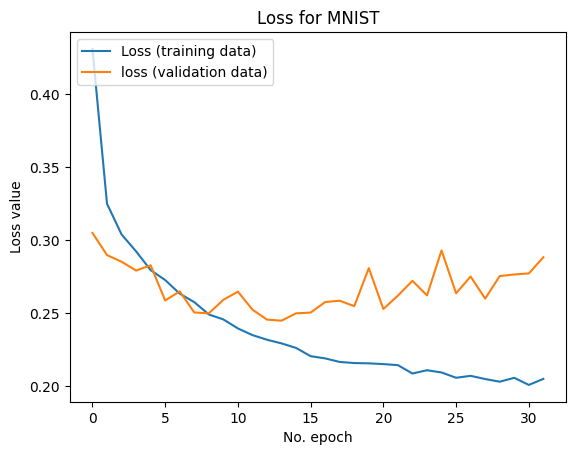

In [37]:
# Plot history of the loss
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='loss (validation data)')
plt.title('Loss for MNIST')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

#### Let's display the history of the accuracy according to the number of epoch

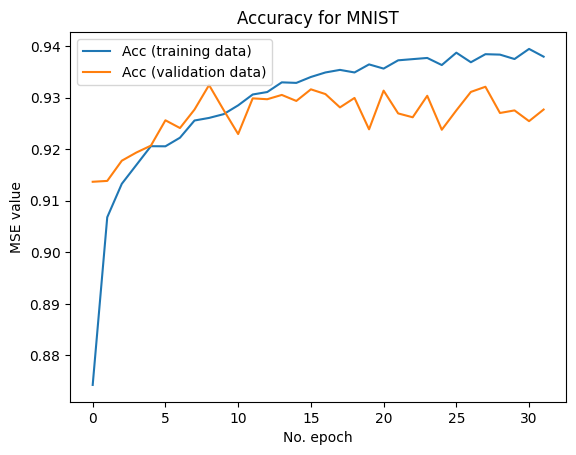

In [38]:
# Plot history
plt.plot(history.history['accuracy'], label='Acc (training data)')
plt.plot(history.history['val_accuracy'], label='Acc (validation data)')
plt.title('Accuracy for MNIST')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

## <font color="red">**Exo3**</font> :
 - Quelle est en pourcentage l'accuracy du modèle sur les 10000 images de test ?
 - Commenter les courbes

<u>Attention</u>: il faut se méfier de l'accuracy que nous avons obtenue. En effet, celle-ci a été calculée à partir d'un seul entrainement du modèle... Pour évaluer correctement le modèle (d'un point de vue statistique), il faudrait entrainer et évaluer le modèle plusieurs fois (au moins 5 fois) et calculer alors l'accuracy moyenne sur l'ensemble de ces "run"

Vos réponses :

## <font color="red">**Exo4**</font> : un second MLP
 - Construire un nouveau modèle (model2) comportant cette fois-ci 2 couches cachées de 100 neurones chacune
 - Retrouver par le calcul le nombre de paramètres entrainables du modèle
 - Compiler, entrainer et évaluer ce modèle

In [48]:
# Create the model (A COMPLETER)
model2 = Sequential()
model2.add(Dense(100, input_shape=(28*28,), activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,620 (311.02 KB)

 Trainable params: 79,620 (311.02 KB)

 Non-trainable params: 0 (0.00 B)

<u>Votre réponse</u>:

In [50]:
optimizer2 = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model2.compile(optimizer = optimizer2,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [51]:
history2 = model2.fit(x_train, y_train,
                      epochs = epochs,
                      batch_size = batch_size,
                      verbose = 1,
                      validation_split=0.2)

Epoch 1/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4583 - loss: 1.4306 - val_accuracy: 0.7739 - val_loss: 0.5795
Epoch 2/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8165 - loss: 0.5232 - val_accuracy: 0.9331 - val_loss: 0.3147
Epoch 3/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9375 - loss: 0.2960 - val_accuracy: 0.9450 - val_loss: 0.2577
Epoch 4/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9456 - loss: 0.2565 - val_accuracy: 0.9395 - val_loss: 0.2519
Epoch 5/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9528 - loss: 0.2101 - val_accuracy: 0.9471 - val_loss: 0.2370
Epoch 6/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9601 - loss: 0.1888 - val_accuracy: 0.9464 - val_loss: 0.2442
Epoch 7/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9597 - loss: 0.1800 - val_accuracy: 0.9503 - val_loss: 0.2241
Epoch 8/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9600 - loss: 0.1817 - val_accuracy: 0.

In [55]:
# the batch size is by default equal to 32 for the Keras evaluate function
score = model2.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {score[0]} - Accuracy: {score[1]}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9438 - loss: 0.2993
Test results - Loss: 0.2614881098270416 - Accuracy: 0.9509000182151794%


#### Let's display the history of the loss according to the number of epoch

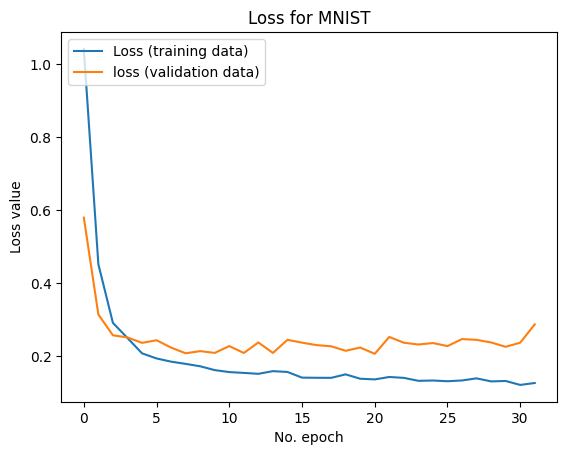

In [53]:
# Plot history
plt.plot(history2.history['loss'], label='Loss (training data)')
plt.plot(history2.history['val_loss'], label='loss (validation data)')
plt.title('Loss for MNIST')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

#### Let's display the history of the accuracy according to the number of epoch

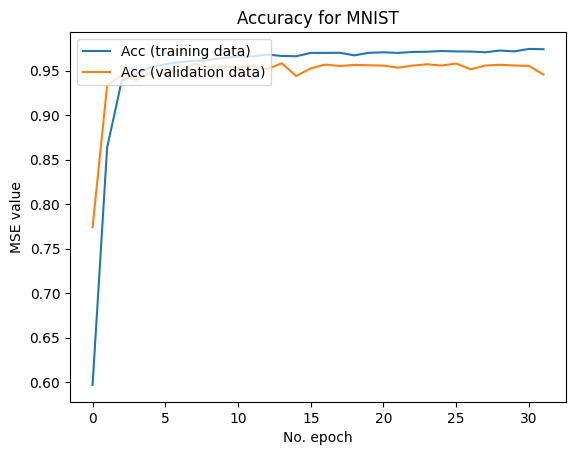

In [54]:
# Plot history
plt.plot(history2.history['accuracy'], label='Acc (training data)')
plt.plot(history2.history['val_accuracy'], label='Acc (validation data)')
plt.title('Accuracy for MNIST')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

## <font color="red">**Exo5**</font> :
* Quelle est en pourcentage l'accuracy de ce 2nd modèle sur les 10000 images de test ?
* Commenter les courbes
* Conclure (comparaison des 2 modèles)

Vos réponses :

## Save a trained model

 - L'entrainement d'un modèle de réseaux de neurones peut être très long (plusieurs heures, voire plusieurs jours !!)
 - Il est donc souvent judicieux de sauvegarder le modèle entrainé.
 - Il existe différents formats pour cela
 - **Keras** possède un **format de sauvegarde** utilisant le HDF5 dont l'extension est .h5 (https://en.wikipedia.org/wiki/Hierarchical_Data_Format).<br>

#### Voici la commande pour **sauvegarder le modèle entrainé** sur votre disque (en fait sur le disque de la machine virtuelle de Colab) :

In [ ]:
# Ici, nous sauvegardons le 1er modèle avce 1 seule couche cachée
model2.save('MLP_MNIST_model.h5')

#### On peut ainsi **recharger le modèle** depuis le fichier sauvegardé:

In [ ]:
# Recréé exactement le même model, incluant poids et optimizer.
loaded_model = keras.models.load_model('MLP_MNIST_model.h5')
loaded_model.summary()

#### Puis **évaluer de nouveau le modèle** rechargé:

In [ ]:
loss, acc = loaded_model.evaluate(x_test, y_test, verbose=1)
#print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')
print(f'Test results - Loss: {loss} - Accuracy: {acc}%')